In [2]:
import torch

import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(context="talk")

In [3]:
x = torch.linspace(0, 10, 100)
y = torch.sin(x) + torch.randn_like(x) * 0.5

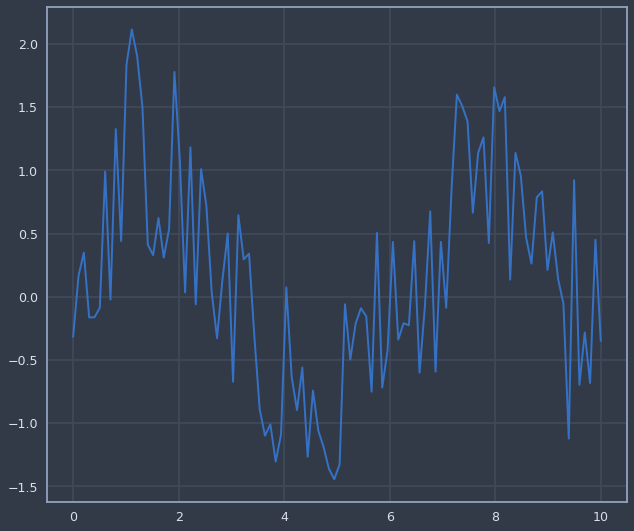

In [4]:
plt.plot(x, y)

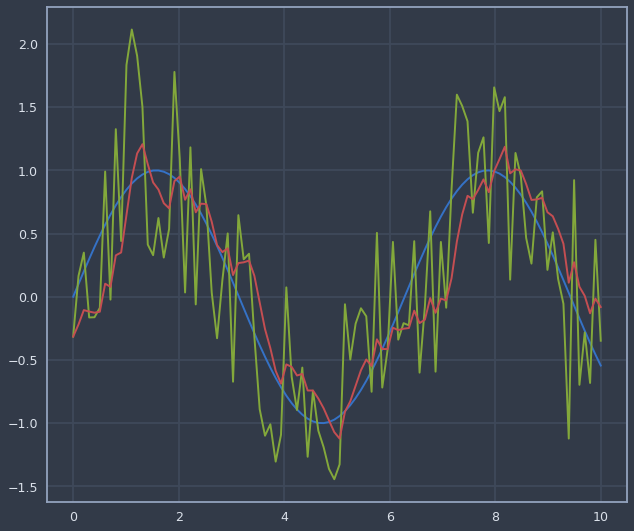

In [12]:
y_ema = [y[0]]
beta = 0.8

for yval in y[1:]:
    new_y_ema = beta * y_ema[-1] + (1 - beta) * yval
    y_ema.append(new_y_ema)

plt.plot(x, torch.sin(x))
plt.plot(x, y)
plt.plot(x, y_ema)

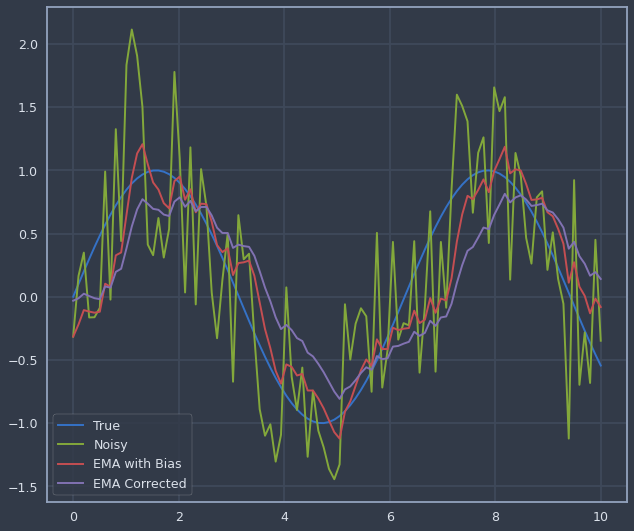

In [37]:
y_ema_corrected = [0]
beta = 0.9

for t, yval in enumerate(y):
    new_y_ema = beta * y_ema_corrected[-1] + (1 - beta) * yval
    new_y_ema_t = new_y_ema / (1 - beta ** (t + 1))
    y_ema_corrected.append(new_y_ema)

plt.plot(x, torch.sin(x), label='True')
plt.plot(x, y, label='Noisy')
plt.plot(x, y_ema, label='EMA with Bias')
plt.plot(x, y_ema_corrected[1:], label='EMA Corrected')
plt.legend()